# Đọc dữ liệu

In [64]:
file_name = r"C:/Users/pbang/Downloads/graph.xlsx"

In [65]:
import pandas as pd

df_node = pd.read_excel(file_name,sheet_name='Nodes')
df_edge = pd.read_excel(file_name,sheet_name='Edges')

In [66]:
df_node.head()

,id,name_nodes,h
0,0,A,14
1,1,B,0
2,2,C,15
3,3,D,6
4,4,E,8


In [67]:
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(df_node,df_edge,direct = False):
    if direct:
        G = nx.DiGraph()
    else:
      G = nx.Graph()
    # Thêm các đỉnh
    nodes = df_node['name_nodes'].tolist()
    G.add_nodes_from(nodes)
    # Thêm các cạnh và trọng số
    edges = [(row['node_start'], row['node_end'], row['weight']) for _, row in df_edge.iterrows()]
    G.add_weighted_edges_from(edges)

    # Tọa độ của các đỉnh
    pos = {
        'A': (2, 3),
        'B': (2, -3),
        'C': (0, 2),
        'D': (1, 1),
        'E': (2.5, 0.5),
        'F': (3, 2),
        'G': (3.2, 0.5),
        'H': (0, -2),
        'I': (2.5, -2),
        'K': (1, -1.5),
    }
    return G,pos

In [68]:
graph,pos = create_graph(df_node,df_edge,direct=False)

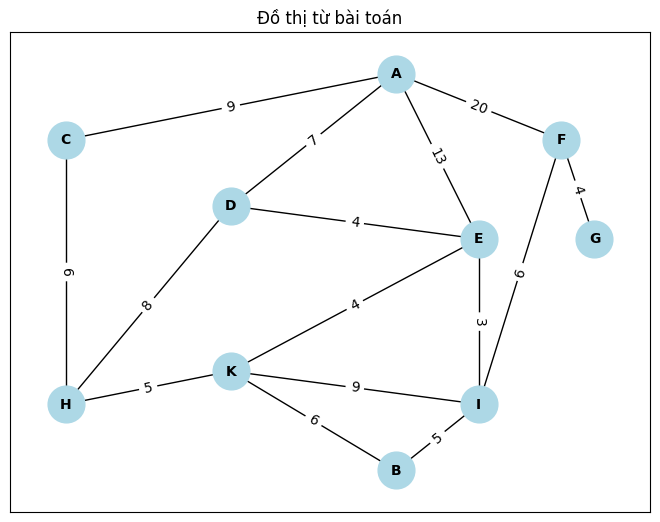

In [69]:
# Vẽ đồ thị
nx.draw(graph, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Hiển thị đồ thị
plt.title("Đồ thị từ bài toán")
plt.axis('on')  # Giữ tỷ lệ giữa các trục
plt.show()


# Hàm trả về đường đi

In [70]:
def path(distances,start, end):
    # Lưu đường đi từ đích tới điểm bắt đầu
    path = []
    # duong_di = []
    # Node đầu tiên là đích
    node = end
    # Duyệt cho tới khi về lại điểm bắt đầu
    while node != start:
        path.append(node)
    # Node tiếp theo là node có gần node trước đó
        node = distances[node][1]
    # Thêm node bắt đầu
    path.append(start)
    # Đảo ngược danh sách để có đường đi từ điểm bắt đầu tới đích
    path = path[::-1]
    p = ' -> '.join(path)
    # Chi phí tới đỉnh đích
    cost = distances[end][0]
    # duong_di.append(path)
    print(f'Path: {p}')
    print(f'Cost: {cost}')
    return path

# Thuật toán Dijkstra

In [71]:
import heapq

def dijkstra(graph, start):
    # Khởi tạo khoảng cách từ đỉnh bắt đầu đến tất cả các đỉnh
    distances = {node: (float('infinity'),None) for node in graph.nodes}
    # Khoảng cách từ đỉnh bắt đầu tới chính nó thì bằng 0
    distances[start] = (0,None)
    # Khởi tạo danh sách khoảng cách
    list_distances = [(0, start)]
    # Danh sách các đỉnh đã duyệt
    closed = []
    while list_distances:
        current_distance, current_node = heapq.heappop(list_distances)
        closed.append(current_node)

        # Nếu khoảng cách hiện tại lớn hơn khoảng cách đã tìm thấy, bỏ qua đỉnh
        if current_distance > distances[current_node][0]:
            continue
      
        # Duyệt qua các cạnh của đỉnh hiện tại
        for neighbor in graph.neighbors(current_node):
          if neighbor not in closed:
            # Tính khoảng cách từ đỉnh hiện tại đến đỉnh láng giềng
            distance = current_distance + graph[current_node][neighbor]['weight']
          else:
            continue

            # Nếu khoảng cách mới nhỏ hơn khoảng cách đã tìm thấy, cập nhật
          if distance < distances[neighbor][0]:
                distances[neighbor] = (distance,current_node)
                heapq.heappush(list_distances, (distance, neighbor))

        print(distances)
        print(list_distances)
        print(closed)
        print('-'*40)
    return distances

In [72]:
list_duong_di_dijkstra = []
list_duong_di_dijkstra=path(dijkstra(graph, 'A'),'A','B')

{'A': (0, None), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (13, 'A'), 'F': (20, 'A'), 'G': (inf, None), 'H': (inf, None), 'K': (inf, None), 'I': (inf, None)}
[(7, 'D'), (13, 'E'), (9, 'C'), (20, 'F')]
['A']
----------------------------------------
{'A': (0, None), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (inf, None), 'I': (inf, None)}
[(9, 'C'), (11, 'E'), (20, 'F'), (15, 'H'), (13, 'E')]
['A', 'D']
----------------------------------------
{'A': (0, None), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (inf, None), 'I': (inf, None)}
[(11, 'E'), (13, 'E'), (20, 'F'), (15, 'H')]
['A', 'D', 'C']
----------------------------------------
{'A': (0, None), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (15, 'E'), 'I': (14, 'E')}
[(13, 'E'), (14, 'I'), (20, 'F'), (

# A*

In [73]:
# Heuristic
h = df_node.set_index('name_nodes')['h'].to_dict()

In [74]:
g,pos = create_graph(df_node,df_edge,direct=True)

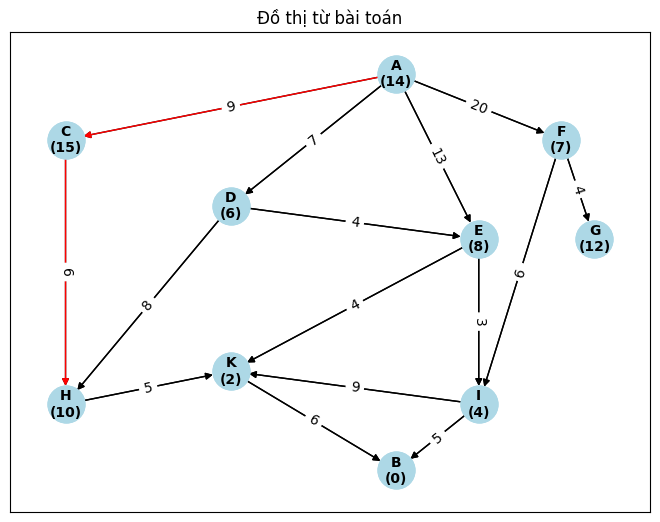

In [75]:
import matplotlib.pyplot as plt
import networkx as nx

# Vẽ đồ thị
nx.draw(g, pos, with_labels=False, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')

# Thêm nhãn cho các đỉnh, bao gồm cả heuristic
node_labels = {node: f"{node}\n({h[node]})" for node in h.keys()}
nx.draw_networkx_labels(g, pos, labels=node_labels, font_size=10, font_weight='bold')

# Danh sách các cạnh muốn tô màu đỏ
red_edges = [("A", "C"), ("C", "H")]  # Thay (u, v) và (x, y) bằng các cạnh cụ thể bạn muốn

# Tô màu các cạnh
edge_colors = ['red' if edge in red_edges else 'black' for edge in g.edges()]
nx.draw(g, pos, with_labels=False, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color=edge_colors)

# Vẽ nhãn cho các cạnh
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

# Hiển thị đồ thị
plt.title("Đồ thị từ bài toán")
plt.axis('on')  # Giữ tỷ lệ giữa các trục
plt.show()


In [76]:
def Astar(graph,start,end,heuristic):
# Khởi tạo khoảng cách từ đỉnh bắt đầu đến tất cả các đỉnh
    g_distances = {node: (float('inf'), None) for node in graph.nodes}
    g_distances[start] = (0, None)  # Khoảng cách từ start đến chính nó
    # Khởi tạo danh sách trạng thái
    open_list = []
    # Danh sách các đỉnh đã duyệt
    closed_list = set()
    # Thêm nút bắt đầu vào open_list
    heapq.heappush(open_list, (0 + heuristic[start], start))  # f = g + h
    while open_list:
      # Chọn node trong open list
        current_f,current_node = heapq.heappop(open_list)
      # Di chuyển node vào closed list
        closed_list.add(current_node)
        print(current_node, current_f)

        if current_node == end:
            print(open_list)
            print(g_distances)
            print('-'*40)
            print('Đã tìm thấy đường đi:')
            path(distances=g_distances,start=start,end=end)
            break
        else:
            for neighbor in graph.neighbors(current_node):
            # Tính khoảng cách từ đỉnh hiện tại đến đỉnh láng giềng
                # g(v) = g(u)+(u,v)
              g = g_distances[current_node][0] + graph[current_node][neighbor]['weight']
              h = heuristic[neighbor]
              # f(v) = g(v) + h(v)
              f = g + h  
              if neighbor in [node for node in closed_list]:
                 # Nếu nút nằm trong closed_list thì bỏ qua
                 continue
              # Kiểm tra xem node(v) kề có nằm trong open_list hay chưa
              if neighbor not in [node for _, node in open_list]: # chưa
              # Thêm node kề và f vào
                heapq.heappush(open_list,(f,neighbor))
              # Lưu lại g(v)
                g_distances[neighbor] = (g,current_node)
              else:
                # Nếu node(v) trong open_list
                # Nều mà g(v) mới tốt hơn (bé hơn) g(v) cũ thì cập nhật
                if g < g_distances[neighbor][0]:
                    g_distances[neighbor] = (g, current_node)
                    # Cập nhật lại f trong open_list
                    # Không thể cập nhật f trực tiếp, cần xóa và thêm lại
                    open_list = [(f, n) if n != neighbor else (f, neighbor) for f, n in open_list]
                    # Gọi heapq.heapify() để tái cấu trúc danh sách thành heap
                    heapq.heapify(open_list)
        if not open_list:
            print('Không tìm thấy đường đi:')
            break
        print(open_list) # lưu f()
        print(g_distances) # lưu g()
        print('-'*40)
    return path(distances=g_distances,start=start,end=end)

In [77]:
list_duong_di_Astar = []
list_duong_di_Astar = Astar(g, 'A','B',h)

A 14
[(13, 'D'), (21, 'E'), (24, 'C'), (27, 'F')]
{'A': (0, None), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (13, 'A'), 'F': (20, 'A'), 'G': (inf, None), 'H': (inf, None), 'K': (inf, None), 'I': (inf, None)}
----------------------------------------
D 13
[(21, 'E'), (25, 'H'), (24, 'C'), (27, 'F')]
{'A': (0, None), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (inf, None), 'I': (inf, None)}
----------------------------------------
E 21
[(17, 'K'), (18, 'I'), (27, 'F'), (25, 'H'), (24, 'C')]
{'A': (0, None), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (15, 'E'), 'I': (14, 'E')}
----------------------------------------
K 17
[(18, 'I'), (21, 'B'), (27, 'F'), (25, 'H'), (24, 'C')]
{'A': (0, None), 'B': (21, 'K'), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (15, 'E'), 'I': (14, '

## Phần hình ảnh

In [78]:
list_duong_di_Astar[0]

'A'

In [79]:
import pygame
import numpy as np
import matplotlib.pyplot as plt

# Khởi tạo Pygame
pygame.init()

# Thiết lập kích thước màn hình
width, height = 1600, 800
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Đồ thị Matplotlib di chuyển trong Pygame")

# Màu sắc nền
background_color = (255, 255, 255)

In [80]:
def ve_hinh(red_edges_Astar,red_edges_dijkstra):
    # Vẽ đồ thị
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 8))
    nx.draw(g, pos,ax = ax1, with_labels=False, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')

    # Thêm nhãn cho các đỉnh, bao gồm cả heuristic
    node_labels = {node: f"{node}\n({h[node]})" for node in h.keys()}
    nx.draw_networkx_labels(g, pos, labels=node_labels, font_size=10, font_weight='bold',ax = ax1)

    # Danh sách các cạnh muốn tô màu đỏ
    # red_edges = [("A", "C"), ("C", "H")]  # Thay (u, v) và (x, y) bằng các cạnh cụ thể bạn muốn

    # Tô màu các cạnh
    if red_edges_Astar:
        edge_colors_Astart = ['red' if edge in red_edges_Astar else 'black' for edge in g.edges()]
        nx.draw(g, pos, with_labels=False, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color=edge_colors_Astart,ax = ax1)
    
    # Vẽ nhãn cho các cạnh
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels,ax = ax1)
    
    # Hiển thị đồ thị
    ax1.set_title("Đồ thị từ bài toán")
    ax1.axis('on')
    # đồ thị 2
    nx.draw(graph, pos,ax = ax2, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    if red_edges_dijkstra:
        edge_colors_dijktras = ['red' if edge in red_edges_dijkstra else 'black' for edge in g.edges()]
        nx.draw(g, pos, with_labels=False, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color=edge_colors_dijktras,ax = ax2)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels,ax = ax2)
    ax2.set_title("Đồ thị từ bài toán")

    # Hiển thị đồ thị
    ax2.axis('on')  # Giữ tỷ lệ giữa các trục
    plt.savefig("plot.png")
    plt.close()

In [81]:
running = True
red_edges_Astar = []
red_edges_dijkstra = []
# Vòng lặp chính
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Cập nhật đồ thị
    ve_hinh(red_edges_Astar, red_edges_dijkstra)

    # Tải hình ảnh vào Pygame
    plot_image = pygame.image.load("plot.png")
    plot_image = pygame.transform.scale(plot_image, (width, height))  # Thay đổi kích thước nếu cần
    
    # Xóa màn hình
    screen.fill(background_color)

    # Vẽ hình ảnh đồ thị
    screen.blit(plot_image, (0, 0))

    # Cập nhật vị trí của Astar để tạo chuyển động
    if len(red_edges_Astar) <= len(list_duong_di_Astar) -2 :
        red_edges_Astar.append((list_duong_di_Astar[len(red_edges_Astar)],list_duong_di_Astar[len(red_edges_Astar)+1]))

    # Cập nhật vị trí của Dijkstra để tạo chuyển động
    if len(red_edges_dijkstra) <= len(list_duong_di_dijkstra) -2 :
        red_edges_dijkstra.append((list_duong_di_dijkstra[len(red_edges_dijkstra)],list_duong_di_dijkstra[len(red_edges_dijkstra)+1]))
    # Cập nhật màn hình
    pygame.display.flip()
    pygame.time.Clock().tick(1)  # Tạm dừng một chút để điều chỉnh tốc độ khung hình

# Thoát Pygame
pygame.quit()